# Building a student intervention system

## 1. What kind of task is this  -  classification or regression?

Before we start to explore the data we firstly need to define the output of the project. Let's recall the task: We need to build a model for student intervention. As a teacher I would expect that I upload the data of my students periodically and I want to know which students need intervention. In that case I would like to receive a list of students (maybe by their names) and a flag if they need intervention or if they don't need intervention. Based on this observation we will build a classification model.

## 2. How does the data look like?

In [2]:
# importing libaries
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# reading the csv data
student_data = pd.read_csv("data/student-data.csv")

In [6]:
# showing 5 randomly selected samples of the dataset
student_data.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
194,GP,M,16,U,GT3,T,2,3,other,other,...,yes,no,5,3,3,1,1,3,0,yes
211,GP,M,17,U,LE3,T,4,4,services,other,...,yes,yes,5,3,5,4,5,3,13,yes
348,GP,F,17,U,GT3,T,4,3,health,other,...,yes,yes,4,4,3,1,3,4,0,yes
166,GP,M,16,U,GT3,T,2,2,other,other,...,yes,no,4,3,5,2,4,4,4,yes
172,GP,M,17,U,LE3,T,4,4,teacher,other,...,yes,no,4,4,4,1,3,5,0,yes


### Dimensions of the dataset

In [7]:
print("Amount of rows:", len(student_data))
print("Amount of attributes:", len(student_data.columns))

Amount of rows: 395
Amount of attributes: 31


In [9]:
# take a look on the statistic of the numeric variables
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [10]:
# displaying all features
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

#### age
description: the age of the students

type: numeric

values: from 15 to 22

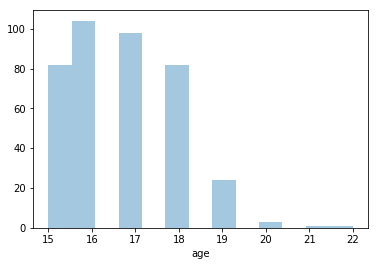

In [11]:
sns.distplot(student_data['age'], kde=False)

#### failures
description: number of past class failures 

type: numeric

values: n if 1<=n<3, else 4


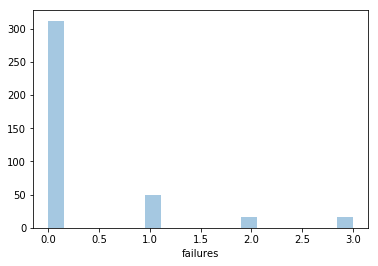

In [12]:
sns.distplot(student_data['failures'], kde=False)

Showing the failures for the age

In [15]:
frame = pd.DataFrame(index = np.arange(len(student_data['failures'])), columns=("Age","Failed", "Failures"))
for i, row in student_data.iterrows():
    frame.loc[i] = [row['age'], row['failures'] > 0, row['failures']]

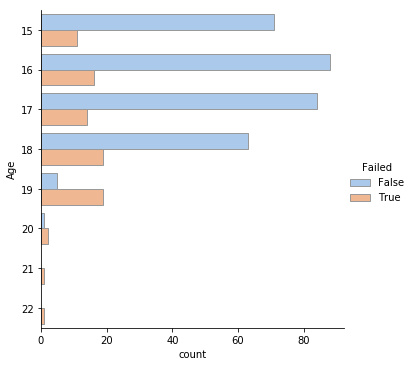

In [16]:
sns.catplot(y="Age", hue="Failed", kind="count",
            palette="pastel", edgecolor=".6",
            data=frame);

#### sex
description: student's sex 

type: binary

values: "F" - female or "M" - male)


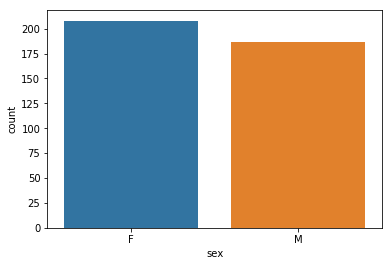

In [17]:
sns.countplot(student_data['sex'])

Distribution of sex for the age groups

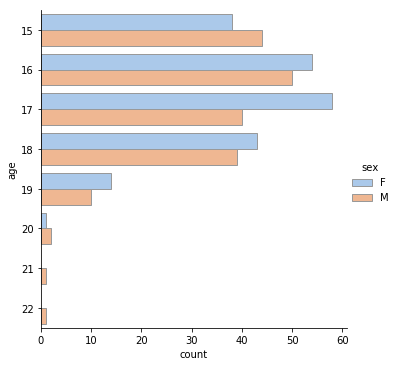

In [18]:
sns.catplot(y="age", hue="sex", kind="count",
            palette="pastel", edgecolor=".6",
            data=student_data);

Distribution of sex for passed

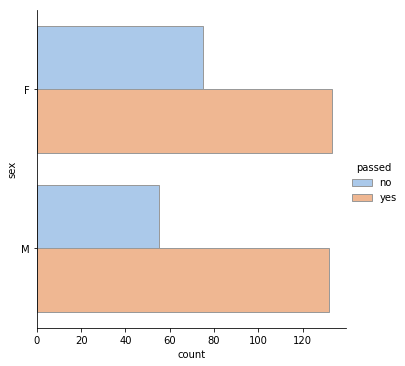

In [19]:
sns.catplot(y="sex", hue="passed", kind="count",
            palette="pastel", edgecolor=".6",
            data=student_data);

#### school

description: student's school

type: binary

values: "GP" or "MS"

Distribution of schools

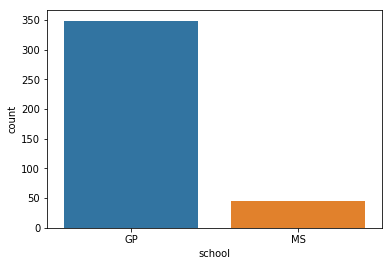

In [23]:
sns.countplot(student_data['school'])

Distribution of passed for school

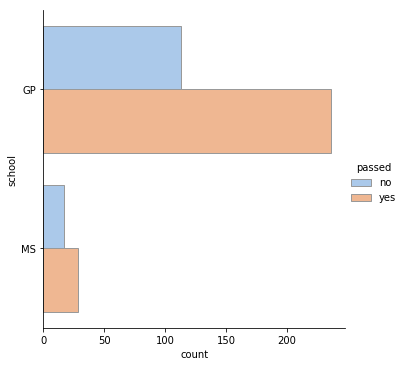

In [24]:
sns.catplot(y="school", hue="passed", kind="count",
            palette="pastel", edgecolor=".6",
            data=student_data);

#### address

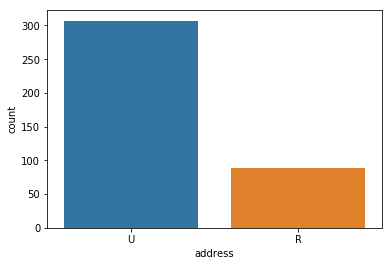

In [25]:
sns.countplot(student_data['address'])

#### famsize

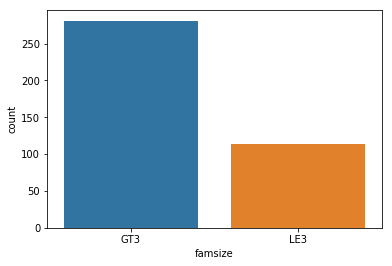

In [26]:
sns.countplot(student_data['famsize'])

#### Pstatus

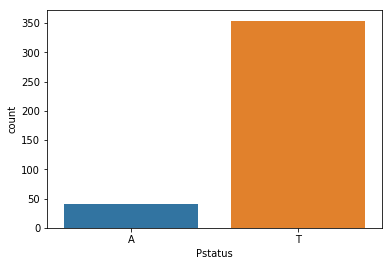

In [27]:
sns.countplot(student_data['Pstatus'])

#### Medu

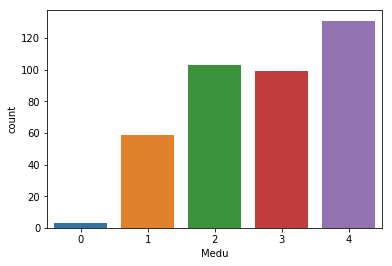

In [28]:
sns.countplot(student_data['Medu'])

#### Fedu

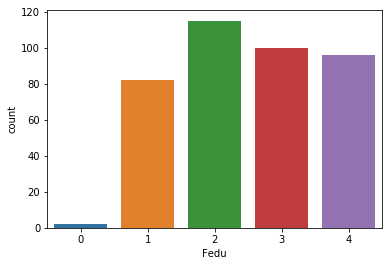

In [29]:
sns.countplot(student_data['Fedu'])

#### Mjob

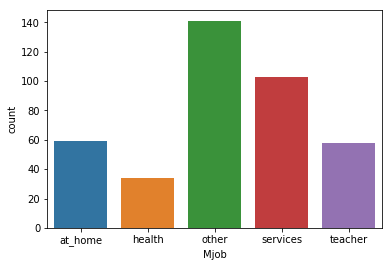

In [30]:
sns.countplot(student_data['Mjob'])

#### Fjob

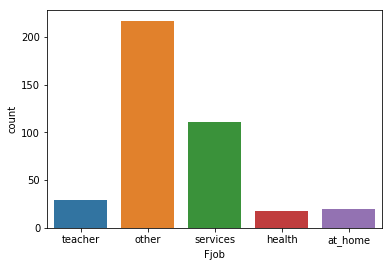

In [31]:
sns.countplot(student_data['Fjob'])

#### reason

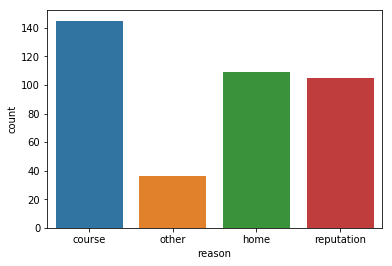

In [32]:
sns.countplot(student_data['reason'])

#### guardian

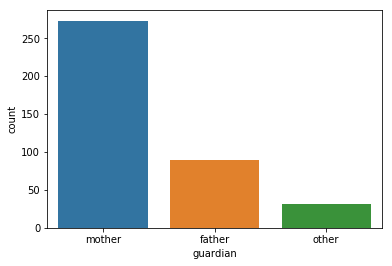

In [33]:
sns.countplot(student_data['guardian'])

#### traveltime

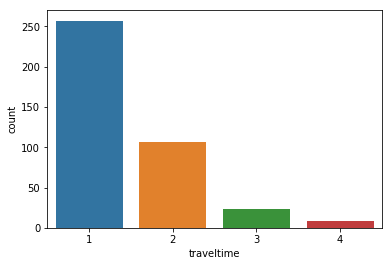

In [34]:
sns.countplot(student_data['traveltime'])

#### studytime

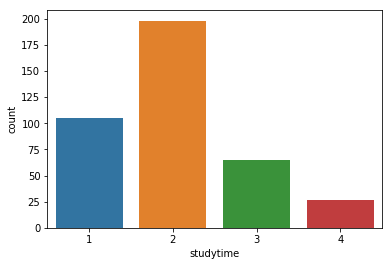

In [35]:
sns.countplot(student_data['studytime'])

#### schoolsup

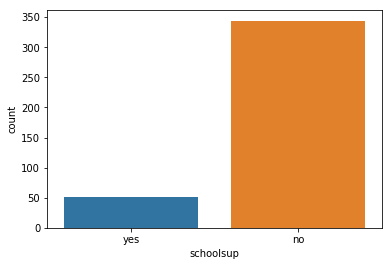

In [36]:
sns.countplot(student_data['schoolsup'])

#### famsup

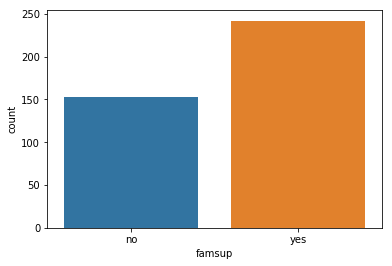

In [37]:
sns.countplot(student_data['famsup'])

#### paid

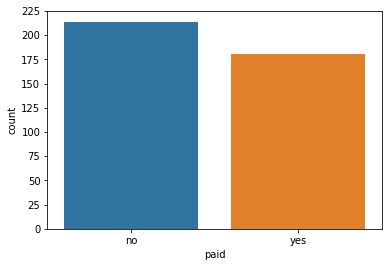

In [38]:
sns.countplot(student_data['paid'])

#### activities

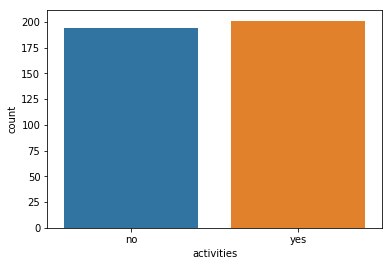

In [39]:
sns.countplot(student_data['activities'])

#### nursery

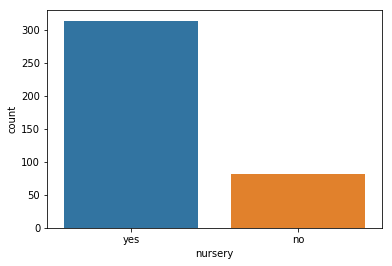

In [40]:
sns.countplot(student_data['nursery'])

#### higher

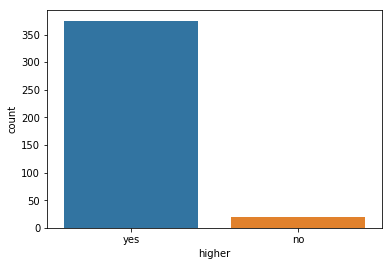

In [41]:
sns.countplot(student_data['higher'])

#### internet

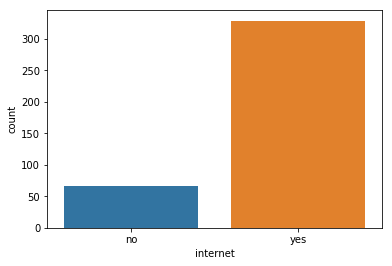

In [42]:
sns.countplot(student_data['internet'])

#### romantic

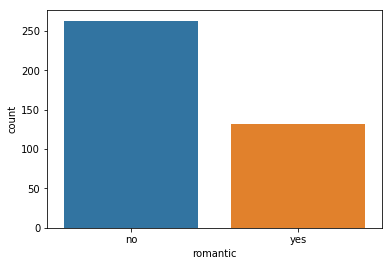

In [43]:
sns.countplot(student_data['romantic'])

#### famrel

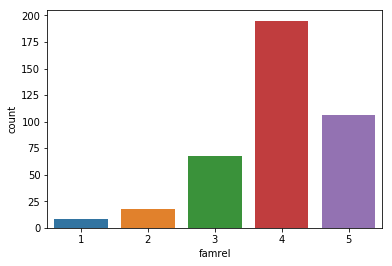

In [44]:
sns.countplot(student_data['famrel'])

#### freetime

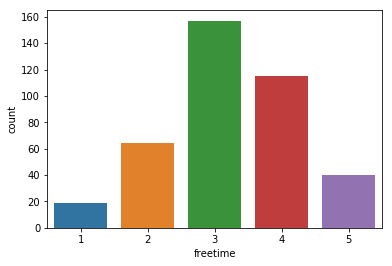

In [45]:
sns.countplot(student_data['freetime'])

#### goout

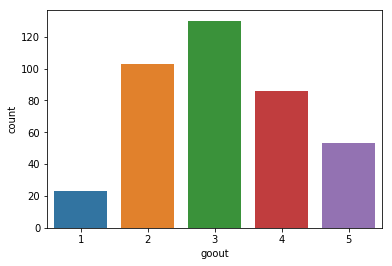

In [46]:
sns.countplot(student_data['goout'])

#### Dalc

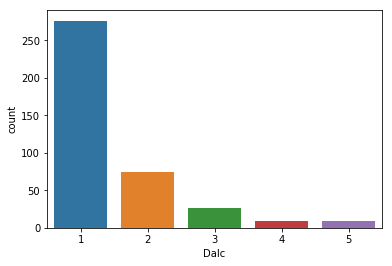

In [47]:
sns.countplot(student_data['Dalc'])

#### Walc

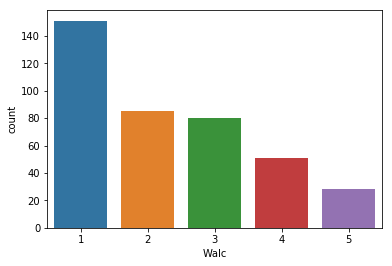

In [48]:
sns.countplot(student_data['Walc'])

#### health

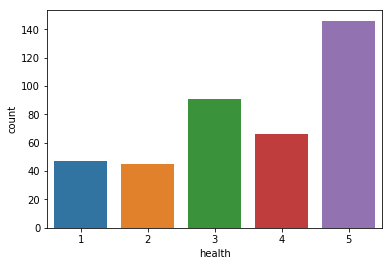

In [49]:
sns.countplot(student_data['health'])

#### absences

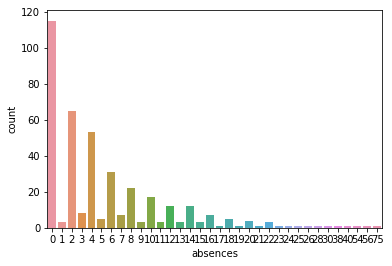

In [50]:
sns.countplot(student_data['absences'])

#### passed

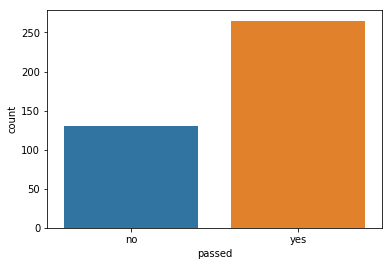

In [51]:
sns.countplot(student_data['passed'])

## 3. Data processing

In [53]:
# Separate data into features and target variabbles
columns = list(student_data.columns)
columns.remove("passed")
feature_cols = columns # all columns except passed
target_col = ['passed'] # passed is target column
print("Feature column(s):-\n{}".format(feature_cols))
print("Target column: {}".format(target_col))


Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: ['passed']


In [54]:
X = student_data[feature_cols]  # feature values for all students
y = student_data[target_col]  # corresponding targets/labels
print("\nFeature values:-")
print(X.sample(5))  # print the 5 samples


Feature values:-
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
213     GP   M   18       U     GT3       T     2     2  services     other   
371     MS   M   18       R     LE3       T     1     2   at_home  services   
257     GP   M   19       U     LE3       A     4     3  services   at_home   
301     GP   M   17       U     LE3       T     4     4     other   teacher   
148     GP   M   16       U     GT3       T     4     4   teacher   teacher   

      ...    higher internet  romantic  famrel  freetime goout Dalc Walc  \
213   ...       yes      yes        no       4         4     4    2    4   
371   ...        no      yes       yes       4         3     3    2    3   
257   ...       yes      yes        no       4         3     1    1    1   
301   ...       yes      yes        no       4         1     1    2    2   
148   ...        no      yes       yes       3         3     2    2    1   

    health absences  
213      5       15  
371   

In [57]:
# Preprocess feature columns
# encoding of binary and nominal data
def preprocess_features(X):
    # initate empty dataframe, where we saved the transformed data
    outX = pd.DataFrame(index=X.index)  
    # Check each column by iterating through items
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        # binary case
        if col_data.dtype == object:
            # changing colums to int 
            col_data = col_data.replace(['yes', 'no'], [1, 0])
            
        # If still non-numeric, convert to one or more dummy variables
        # nominal case
        if col_data.dtype == object:
             # e.g. 'guardian' => 'guardian_mother', 'guardian_father', ... 
            col_data = pd.get_dummies(col_data, prefix=col) 
        
        # collect data in output frame
        outX = outX.join(col_data)  

    return outX

X = preprocess_features(X)
print(X.head)
print("Processed feature columns (%s):-\n{%s}" % (str(len(X.columns)), str(list(X.columns))))

<bound method NDFrame.head of      school_GP  school_MS  sex_F  sex_M  age  address_R  address_U  \
0            1          0      1      0   18          0          1   
1            1          0      1      0   17          0          1   
2            1          0      1      0   15          0          1   
3            1          0      1      0   15          0          1   
4            1          0      1      0   16          0          1   
5            1          0      0      1   16          0          1   
6            1          0      0      1   16          0          1   
7            1          0      1      0   17          0          1   
8            1          0      0      1   15          0          1   
9            1          0      0      1   15          0          1   
10           1          0      1      0   15          0          1   
11           1          0      1      0   15          0          1   
12           1          0      0      1   15          0     

### Train and test

In [59]:
# split data into 75% train and 25% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, shuffle=True)

# Training of algorithms

In [60]:
# Class to store different information about a trained classifier
class ClassifierInfo:
    def __init__(self, clf, training_time, prediction_time, f1_score):
        self.clf = clf
        self.t = training_time
        self.p = prediction_time
        self.f1_score = f1_score

In [61]:
import time

# train a model and measure the time, output of time in seconds
def train_classifier(clf, X_train, y_train):
    print("Training {}...".format(clf.__class__.__name__))
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    difference = round((end - start),3)
    print("Done!\nTraining time (secs): {:.3f}".format(difference))
    return difference

# predict with a model and measure the time needed for the prediction
# return y_pred for further computations
def predict_classifier(clf, X_test, y_test):
    print("Prediction {}...".format(clf.__class__.__name__))
    start = time.time()
    y_pred = clf.predict(X_test)
    end = time.time()
    difference = round((end - start),3)
    print("Done!\nPrediction time (secs): {:.3f}".format(difference))
    return difference, y_pred

In [63]:
import sklearn

# function to measure f1score
def f1score(y_true, y_pred):
    return sklearn.metrics.f1_score(y_true, y_pred, average='weighted') 

# coordination function for training, predicting and measuring
def train_predict(clf, X_train, y_train, X_test, y_test):
    print("------------------------------------------")
    print("Training set size: {}".format(len(X_train)))
    training_time = train_classifier(clf, X_train, y_train)
    prediction_time, y_pred = predict_classifier(clf, X_test, y_test)
    f1_score = f1score(y_test, y_pred )
    print("F1 score of {} is {}".format(clf.__class__.__name__, f1_score))
    return ClassifierInfo(clf, training_time, prediction_time, f1_score)


In [64]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_info = train_predict(nb, X_train, y_train, X_test, y_test)


------------------------------------------
Training set size: 296
Training GaussianNB...
Done!
Training time (secs): 0.004
Prediction GaussianNB...
Done!
Prediction time (secs): 0.001
F1 score of GaussianNB is 0.6499940169917434


/Users/naxty/miniconda3/envs/telekom/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn_info = train_predict(knn, X_train, y_train, X_test, y_test)

------------------------------------------
Training set size: 296
Training KNeighborsClassifier...
Done!
Training time (secs): 0.002
Prediction KNeighborsClassifier...
Done!
Prediction time (secs): 0.003
F1 score of KNeighborsClassifier is 0.6218487394957983


/Users/naxty/miniconda3/envs/telekom/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


In [66]:
from sklearn import svm
svc = svm.SVC()
svm_info = train_predict(svc, X_train, y_train, X_test, y_test)

------------------------------------------
Training set size: 296
Training SVC...
Done!
Training time (secs): 0.006
Prediction SVC...
Done!
Prediction time (secs): 0.001
F1 score of SVC is 0.5854463615903975


/Users/naxty/miniconda3/envs/telekom/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


| Algorithm | Training Time (secs) | Prediction Time (secs) | F1 Score
|------|------|------|------|
|   GaussianNB  | 0.003|0.001| 0.649|
|   KNN  | 0.011|0.004| 0.621|
|   SVC  | 0.009|0.002| 0.585|